In [1]:
#Exercise
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [2]:
df = pd.read_json("/Users/admin/Downloads/Dataset.json")

In [3]:
print(df.shape)

(527, 2)


In [4]:
df.head(5)

,tag,text
0,real,Exclusive: Aramco agrees on price for Sabic ac...
1,real,#Digitisation contract signed in #SaudiArabia ...
2,fake,The #Taliban will not attend planned peace tal...
3,real,#Qatar have used #Khashoggi to write all of th...
4,real,#Saudi sets clear rules and regulations to pro...


In [5]:
df.tag.value_counts()

tag
real    354
fake    173
Name: count, dtype: int64

In [6]:
df["tag_num"] = df.tag.map({"real":0,"fake":1})

In [8]:
df.head(5)

,tag,text,tag_num
0,real,Exclusive: Aramco agrees on price for Sabic ac...,0
1,real,#Digitisation contract signed in #SaudiArabia ...,0
2,fake,The #Taliban will not attend planned peace tal...,1
3,real,#Qatar have used #Khashoggi to write all of th...,0
4,real,#Saudi sets clear rules and regulations to pro...,0


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test,y_train,y_test = train_test_split(df.text,df.tag_num,test_size=0.2,random_state=2022,stratify = df.tag_num)

In [15]:
X_test.shape

(106,)

In [16]:
X_train.shape

(421,)

In [18]:
classifier = Pipeline([
    ("vectorizer_bow",CountVectorizer(ngram_range = (1,3))),
    ("knn", KNeighborsClassifier(n_neighbors=10,metric = 'euclidean'))
])
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        71
           1       1.00      0.26      0.41        35

    accuracy                           0.75       106
   macro avg       0.87      0.63      0.63       106
weighted avg       0.82      0.75      0.70       106



In [19]:
classifier = Pipeline([
    ("vectorizer_bow",CountVectorizer(ngram_range = (3,3))),
    ("knn", KNeighborsClassifier(n_neighbors=10,metric = 'cosine'))
])
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        71
           1       1.00      0.40      0.57        35

    accuracy                           0.80       106
   macro avg       0.89      0.70      0.72       106
weighted avg       0.85      0.80      0.77       106



In [20]:
from sklearn.ensemble import RandomForestClassifier


In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
classifier = Pipeline([
    ("vectorizer_bow",CountVectorizer(ngram_range = (1,3))),
    ("rf", RandomForestClassifier())
])
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86        71
           1       0.93      0.40      0.56        35

    accuracy                           0.79       106
   macro avg       0.85      0.69      0.71       106
weighted avg       0.82      0.79      0.76       106



In [42]:
print(confusion_matrix(y_test, y_pred))

[[70  1]
 [21 14]]


Text(95.72222222222221, 0.5, 'Truth')

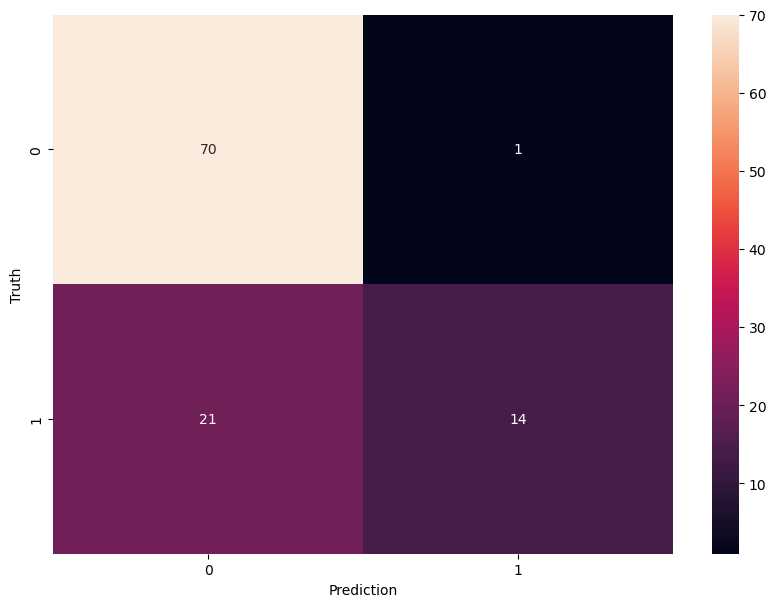

In [43]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')